In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv("scores_data.csv")
df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [17]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [20]:
df.columns = df.columns.str.strip()

In [21]:
df['Batch'].value_counts()

Batch
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [22]:
df['Score'] = (df['Score'].astype(str).str.split('/').str[0])
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

In [23]:
df.groupby('Batch')['Score'].mean().sort_values(ascending=False)

Batch
AI_ELITE_7    5.056604
AI_ELITE_6    4.229167
AI_ELITE_4    3.791667
Name: Score, dtype: float64

In [24]:
df.groupby('Batch')['Score'].agg(['mean','median','std','min','max'])

,mean,median,std,min,max
Batch,,,,,
AI_ELITE_4,3.791667,4.0,1.443376,0,7
AI_ELITE_6,4.229167,4.0,1.640441,0,7
AI_ELITE_7,5.056604,5.0,1.446682,2,7


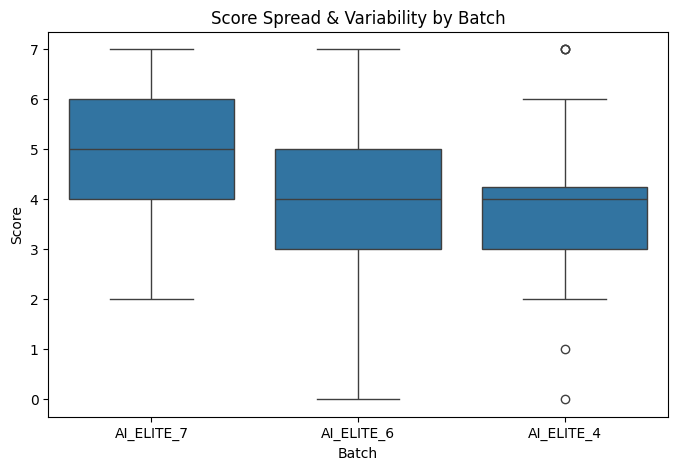

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Batch", y="Score")
plt.title("Score Spread & Variability by Batch")
plt.show()


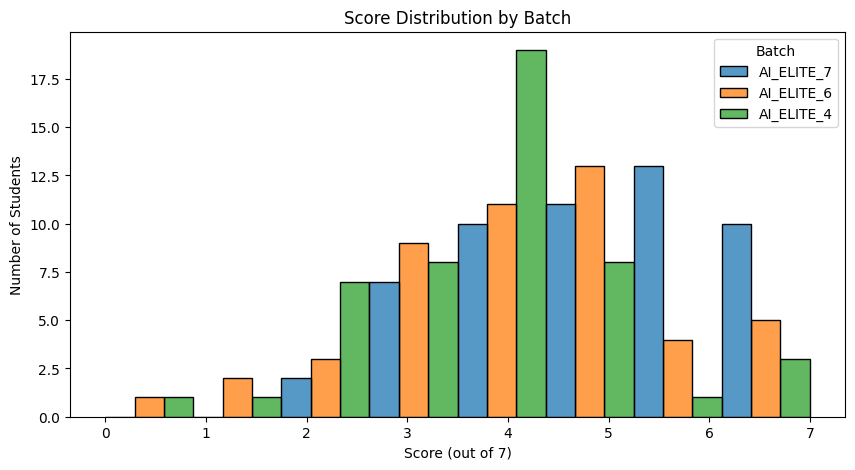

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Score", hue="Batch", multiple="dodge", bins=8)
plt.title("Score Distribution by Batch")
plt.xlabel("Score (out of 7)")
plt.ylabel("Number of Students")
plt.show()


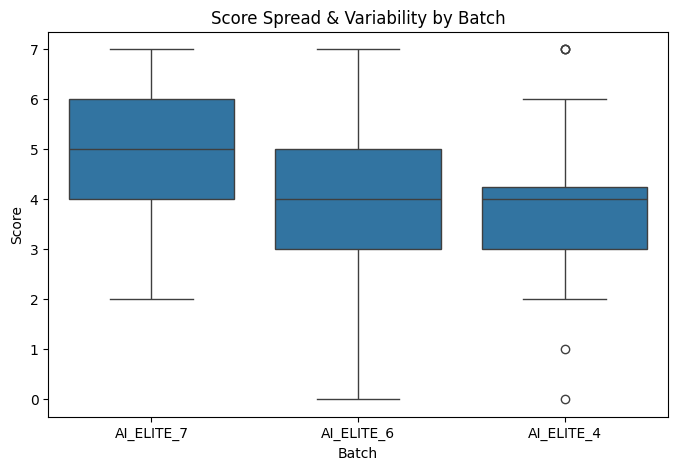

In [28]:
high_performers = (
    df[df["Score"] >= 5]
    .groupby("Batch")
    .size() / df.groupby("Batch").size()
) * 100

high_performers.round(2)


Batch
AI_ELITE_4    25.00
AI_ELITE_6    45.83
AI_ELITE_7    64.15
dtype: float64

In [30]:
score_dist = pd.crosstab(df["Batch"], df["Score"])
score_dist


Score,0,1,2,3,4,5,6,7
Batch,,,,,,,,
AI_ELITE_4,1,1,7,8,19,8,1,3
AI_ELITE_6,1,2,3,9,11,13,4,5
AI_ELITE_7,0,0,2,7,10,11,13,10


In [31]:
batch_stats.sort_values(by="mean", ascending=False)


,count,mean,median,std,min,max
Batch,,,,,,
AI_ELITE_7,53,5.056604,5.0,1.446682,2,7
AI_ELITE_6,48,4.229167,4.0,1.640441,0,7
AI_ELITE_4,48,3.791667,4.0,1.443376,0,7


## Batch-wise Insights

- **AI_ELITE_7** shows the best overall performance with higher average scores, multiple perfect scores, and low variability, indicating strong consistency and better concept understanding.
- **AI_ELITE_6** displays mixed performance with a wide score range (0–7), suggesting the presence of both high performers and struggling students.
- **AI_ELITE_4** has comparatively lower scores, mostly concentrated between 2 and 4, indicating weaker overall performance and the need for additional academic support.

### Conclusion
Student performance improves progressively from AI_ELITE_4 to AI_ELITE_7, reflecting positive learning and program development over batches.
